In [1]:
import random
import numpy as np
import plotly.express as px

def simulate_1d_rw(nsteps=1000, p=0.5, stepsize=1):
    steps = [ 1*stepsize if random.random() < p else -1*stepsize for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = list(range(len(y)))

    return x, list(y)

simulation_data = {}
nsims = 5
for i in range(nsims):
    x, y = simulate_1d_rw()
    simulation_data['x'] = x
    simulation_data['y{col}'.format(col=i)] = y

ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
fig = px.line(simulation_data, x='x', y=ycols)
fig.show()

In [2]:
import random
import numpy as np
import plotly.express as px

def simulate_2d(nsteps=10000, stepsize=1):

    deltas = [ (0,-1*stepsize), (-1*stepsize,0), (0,1*stepsize), (1*stepsize,0) ]

    steps = [ list(random.choice(deltas)) for i in range(nsteps) ]
    steps = np.array(steps)
    steps = np.cumsum(steps,axis=0)
    y = list(steps[:,1])
    x = list(steps[:,0])

    return x, y

x, y = simulate_2d()
fig = px.line({ 'x' : x, 'y' : y }, x='x', y='y')
fig.show()

In [3]:
import random
import numpy as np
import plotly.express as px

def simulate_3d_rw(nsteps=10000, stepsize=1):

    deltas = [ (0,0,-1*stepsize), (0,-1*stepsize,0), (-1*stepsize,0,0),\
               (0,0,1*stepsize), (0,1*stepsize,0), (1*stepsize,0,0) ]

    steps = [ list(random.choice(deltas)) for i in range(nsteps) ]
    steps = np.array(steps)
    steps = np.cumsum(steps,axis=0)
    z = list(steps[:,2])
    y = list(steps[:,1])
    x = list(steps[:,0])

    return x, y, z

x, y, z = simulate_3d_rw()
fig = px.line_3d({ 'x' : x, 'y' : y, 'z' : z }, x='x', y='y', z='z')
fig.show()

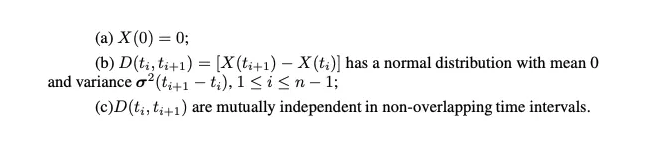

In [4]:
import random
import numpy as np
import plotly.express as px

def simulate_1d_bm(nsteps=1000, t=0.01):
    steps = [ np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_bm()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
fig = px.line(simulation_data, x='x', y=ycols)
fig.show()

In [5]:
import random
import numpy as np
import plotly.express as px

def simulate_2d_bm(nsteps=1000, t=0.01):
    x = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    return list(x), list(y)

x, y = simulate_2d_bm()
fig = px.line({ 'x' : x, 'y' : y }, x='x', y='y')
fig.show()

In [6]:
import random
import numpy as np
import plotly.express as px

def simulate_3d_bm(nsteps=10000, t=0.01):
    x = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    z = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    return list(x), list(y), list(z)

x, y, z = simulate_3d_bm()
fig = px.line_3d({ 'x' : x, 'y' : y, 'z' : z }, x='x', y='y', z='z')
fig.show()

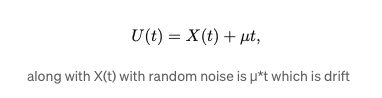

In [7]:
import random
import numpy as np
import plotly.express as px

def simulate_1d_bm_with_drift(nsteps=1000, t=0.01, mu=0.5):
    steps = [ mu*0.01 + np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_bm_with_drift()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
fig = px.line(simulation_data, x='x', y=ycols)
fig.show()

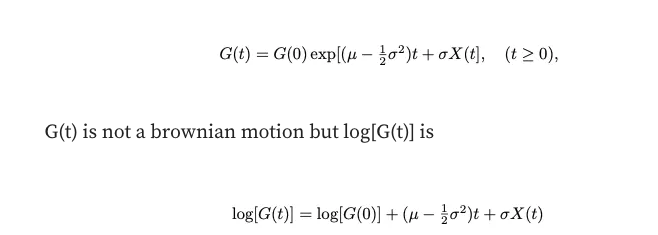

In [8]:
import random
import numpy as np
import plotly.express as px

def simulate_1d_gbm(nsteps=1000, t=1, mu=0.0001, sigma=0.02):
    steps = [ (mu - (sigma**2)/2) + np.random.randn()*sigma for i in range(nsteps) ]
    y = np.exp(np.cumsum(steps))
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_gbm()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
fig = px.line(simulation_data, x='x', y=ycols)
fig.show()

In [9]:
import pandas_datareader.data as web
import numpy as np
import plotly.express as px
import random

def simulate_1d_gbm(nsteps=1000, t=1, mu=0.0001, sigma=0.02, start=1):
    steps = [ (mu - (sigma**2)/2) + np.random.randn()*sigma for i in range(nsteps) ]
    y = start*np.exp(np.cumsum(steps))
    x = [ t*i for i in range(nsteps) ]
    return x, y

df = web.DataReader('^DJI', 'stooq')
mask = ( '2022-01-01' <= df.index ) & ( df.index <= '2022-12-31' )
df = df[mask]
prices = np.flip(df['Close'].values)

logprices = np.log(prices)
logreturns = logprices[1:] - logprices[:-1]
mu = np.mean(logreturns)
sigma = np.std(logreturns)
nsteps = logprices.shape[0]

x, y = simulate_1d_gbm(nsteps=nsteps, mu=mu, sigma=sigma, start=prices[0])

data = {}
data['x'] = x
data['Simulation'] = y
data['DowJonesIndex'] = prices

fig = px.line(data,x='x', y=['DowJonesIndex', 'Simulation'])
fig.show()